In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Spectral")
sns.set_palette("magma_r")
sns.set_palette("crest")
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap

params = {
    'legend.fontsize': 15,
    'figure.figsize': (15, 8),
    'axes.labelsize': '35',
    'axes.titlesize':'30',
    'xtick.labelsize':'30',
    'ytick.labelsize':'30',
    'axes.titlepad': 25
}
plt.rcParams.update(params)

In [2]:
from IPython.core.display import display, HTML
from IPython.core.pylabtools import figsize
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display

cellWidth, cellHeight = 90, 50
display(HTML(
    "<style>.container { width:" + str(cellWidth) + "% !important; }</style>"
    ))
display(HTML(
    '''<style>
        div.input_area {
            overflow-y: scroll;
        }
        div.input_area {
            max-height: ''' +str(cellHeight)+'''em !important;
        }
        div.output_area {
            overflow-y: scroll;
        }
        div.output_area img {
            max-width: unset;
        }
    </style>'''
))

HTML(value='<style>.container { width:90% !important; }</style>')

HTML(value='<style>\n        div.input_area {\n            overflow-y: scroll;\n        }\n        div.input_a…

In [3]:
theme = 'crest'

In [4]:
dists = ['Rotation', 'Gumbel', 'Laplace', 'Logistic', 'Normal', 'Vonmises']

In [5]:
import sys
import importlib.util
spec = importlib.util.spec_from_file_location('datasets.py', r'C:\Users\Telahun\Documents\School\Thesis\Paper1\QMLThesis\Pytorch\MEngCode\datasets.py')
datagen = importlib.util.module_from_spec(spec)
spec.loader.exec_module(datagen)

In [10]:
def add_subplot_border(ax, width=7, color='black'):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)

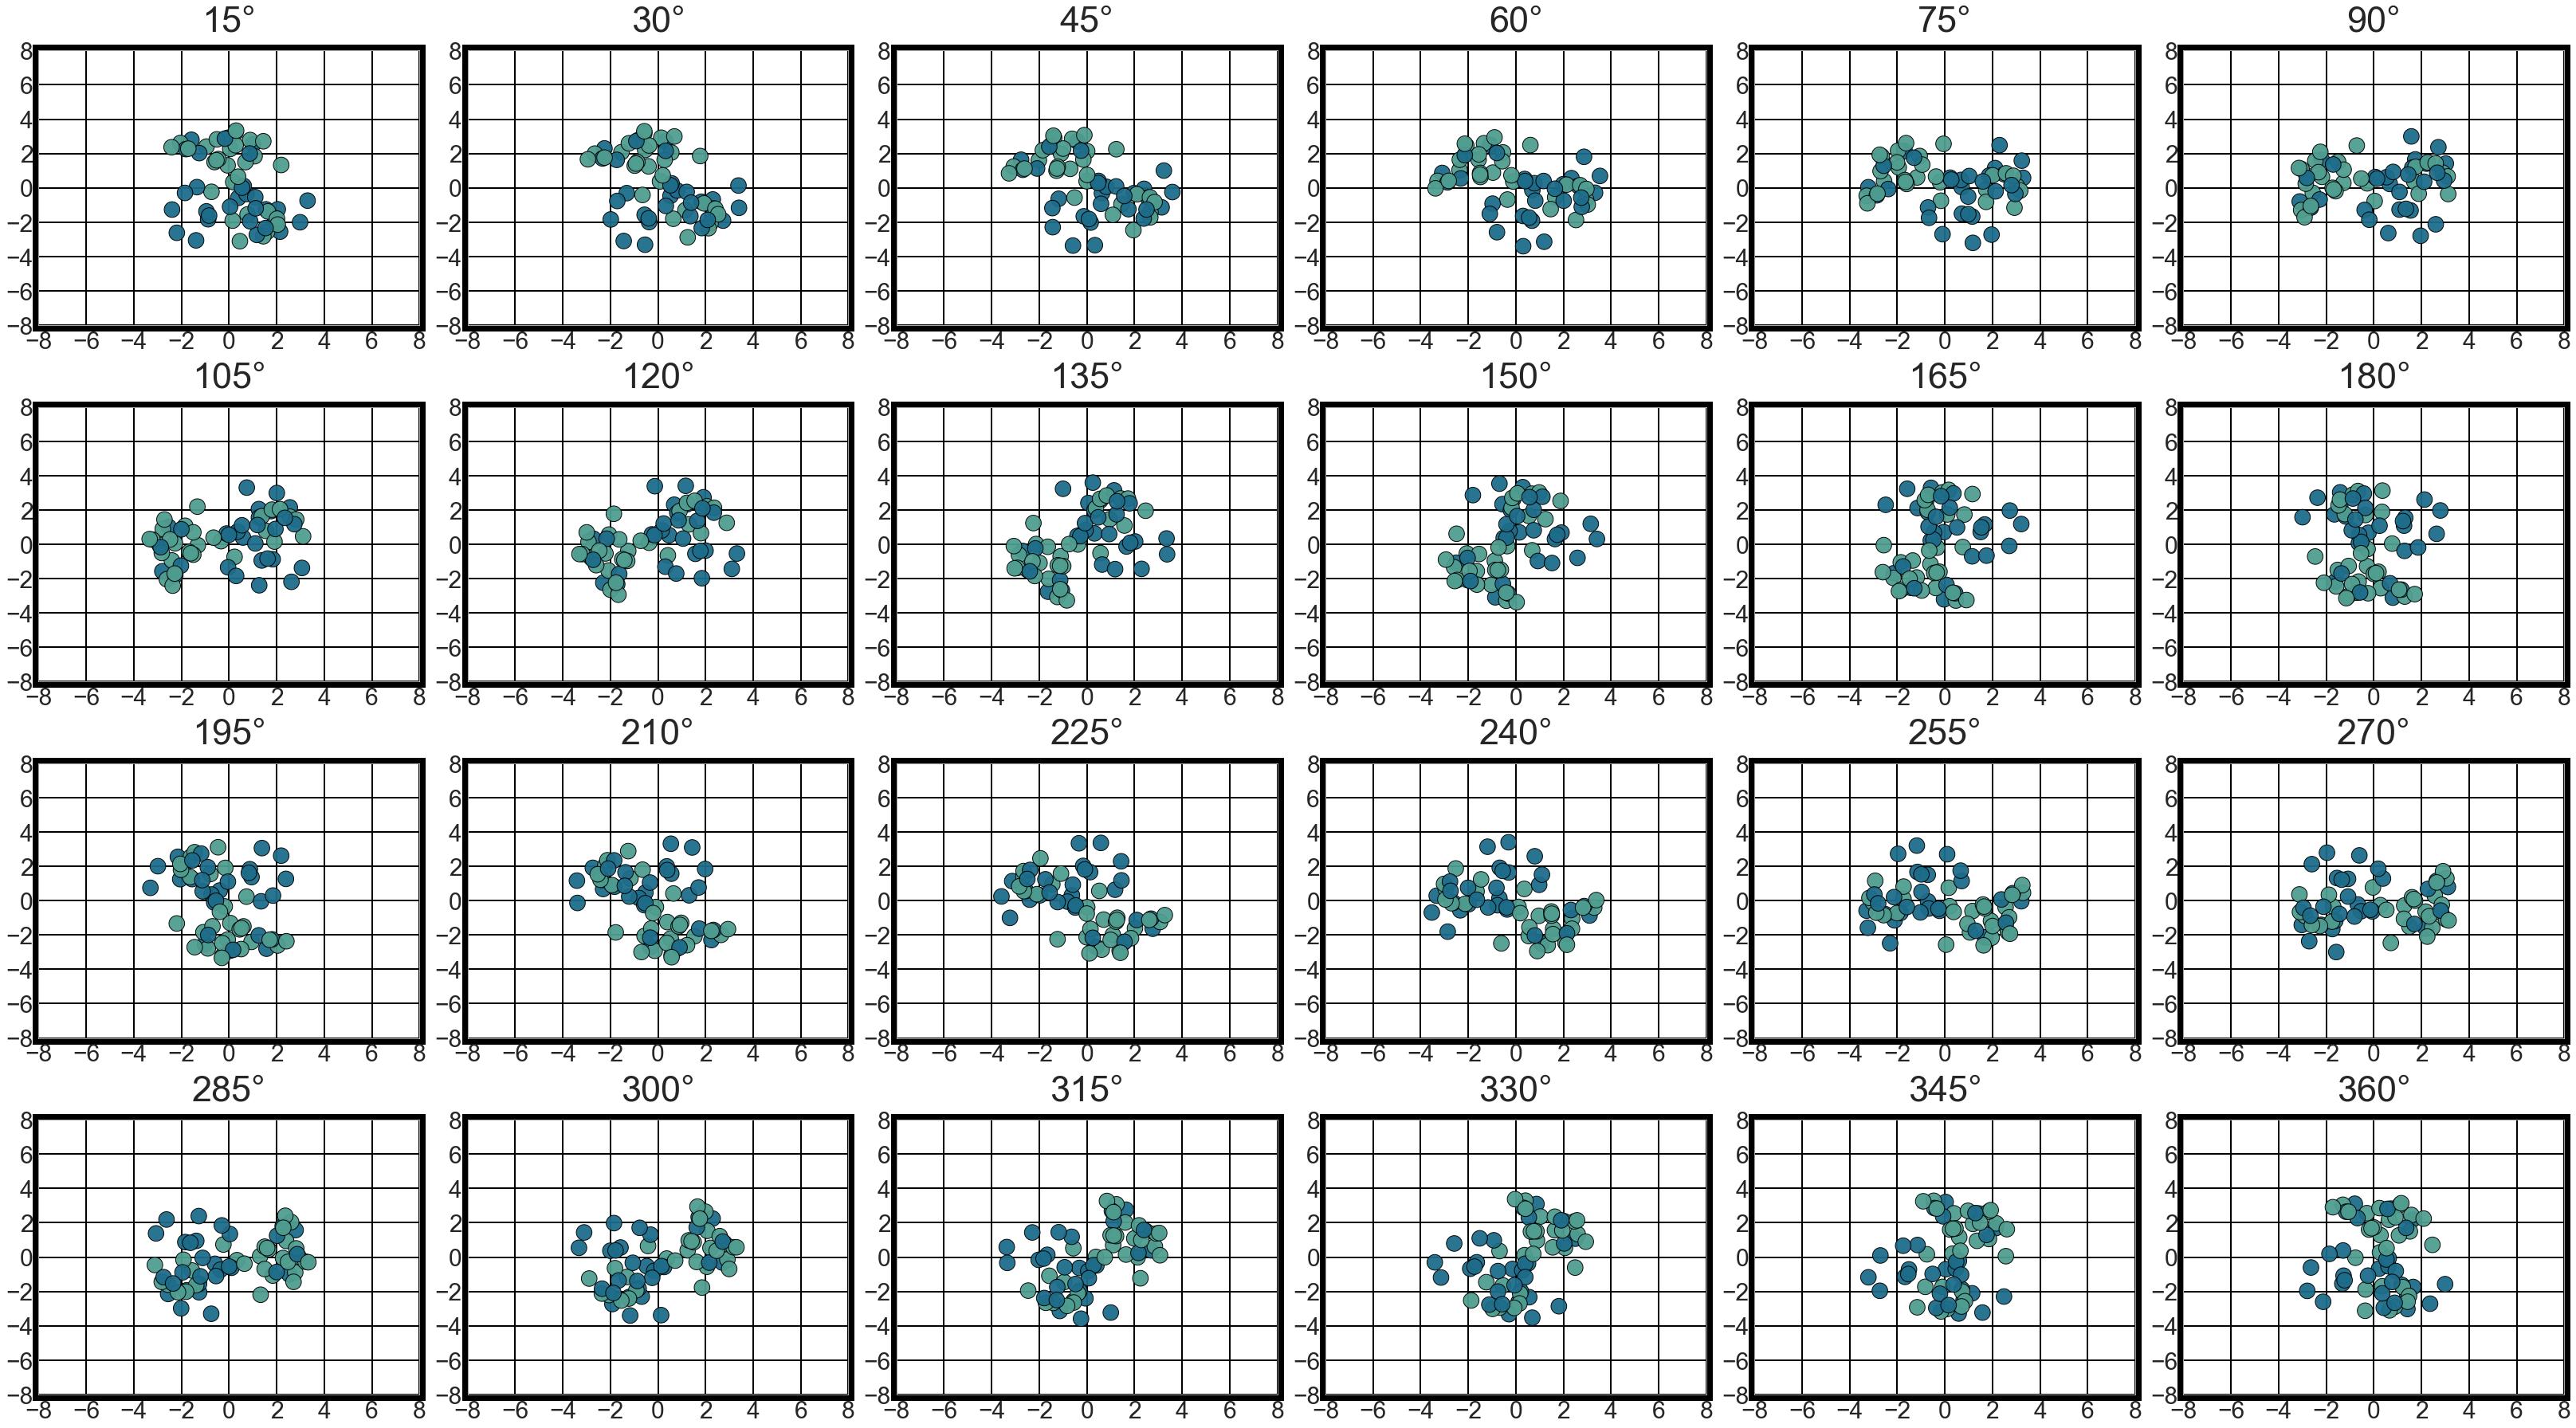

## Angle_Acc

In [12]:
Angle_Acc = pd.read_excel('vqc_data_summary_latest.xlsx',sheet_name='Angle_Acc')
Angle_Acc.columns = Angle_Acc.columns.str.title().str.strip()
Angle_Acc[Angle_Acc.columns.difference(['Rotation'])] = Angle_Acc[Angle_Acc.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

In [13]:
Angle_Acc_qsvm = pd.read_excel('qsvm_data_summary_latest.xlsx',sheet_name='Angle_Acc')
Angle_Acc_qsvm.columns = Angle_Acc_qsvm.columns.str.title().str.strip()
Angle_Acc_qsvm[Angle_Acc_qsvm.columns.difference(['Rotation'])] = Angle_Acc_qsvm[Angle_Acc_qsvm.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

In [14]:
Angle_Acc.head(2)

,Rotation,Gumbel,Laplace,Logistic,Normal,Vonmises,Average,Variance
0,0,0.333,0.500,0.5,0.333,0.5,0.433,0.007
1,15,0.500,0.583,0.5,0.583,0.5,0.533,0.002


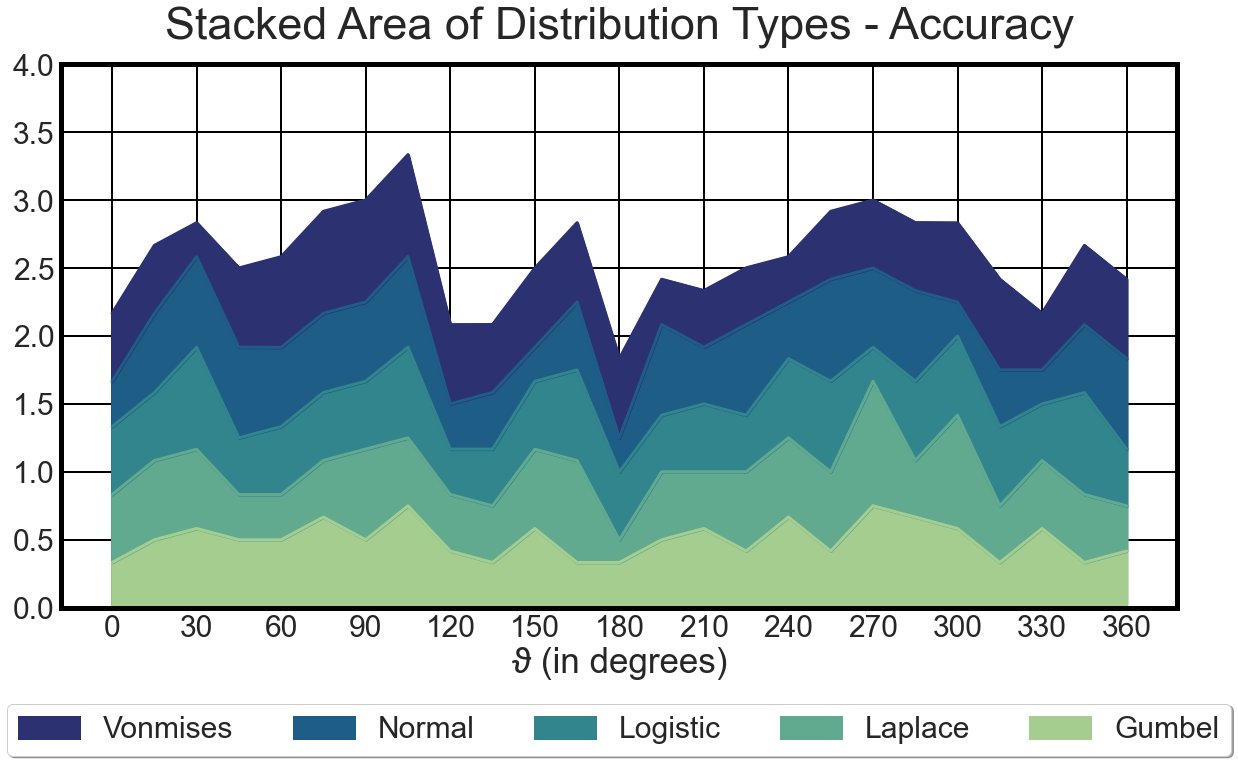

In [15]:
fig = plt.figure(figsize=(20,10))#, dpi=400)

ax = fig.add_subplot(1, 1, 1)

ax = Angle_Acc[dists].plot.area(x='Rotation',ax=ax, cmap=theme, linewidth=3)

plt.title('Stacked Area of Distribution Types - Accuracy',fontsize=45)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 4.5, 0.5))
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')

## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.30), ncol=5, fancybox=True, shadow=True, fontsize=30)

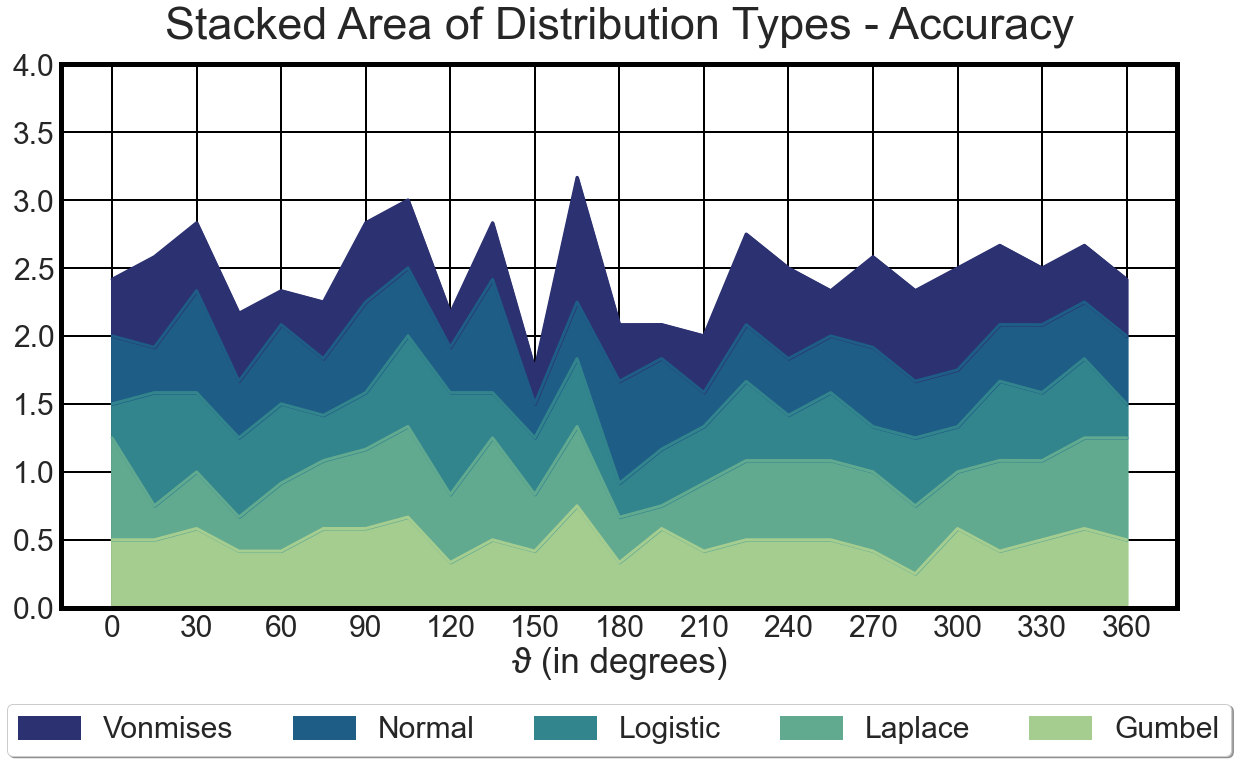

In [16]:
fig = plt.figure(figsize=(20,10))#, dpi=400)

ax = fig.add_subplot(1, 1, 1)

ax = Angle_Acc_qsvm[dists].plot.area(x='Rotation',ax=ax, cmap=theme, linewidth=3)

plt.title('Stacked Area of Distribution Types - Accuracy',fontsize=45)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 4.5, 0.5))
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')

## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.30), ncol=5, fancybox=True, shadow=True, fontsize=30)

In [17]:
fmri = sns.load_dataset("fmri")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

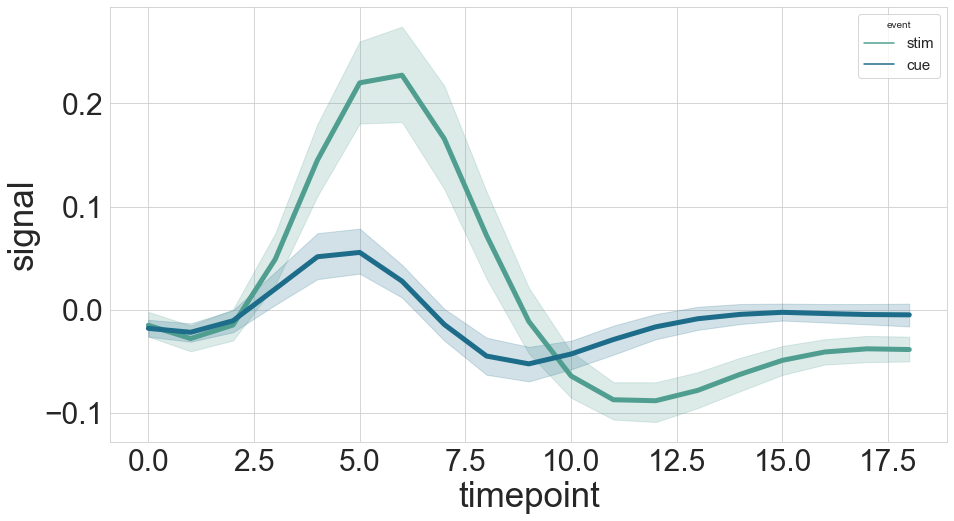

In [18]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", palette=theme, lw=5)

In [19]:
a = pd.melt(Angle_Acc[dists],id_vars=['Rotation'])

<AxesSubplot:xlabel='Rotation', ylabel='value'>

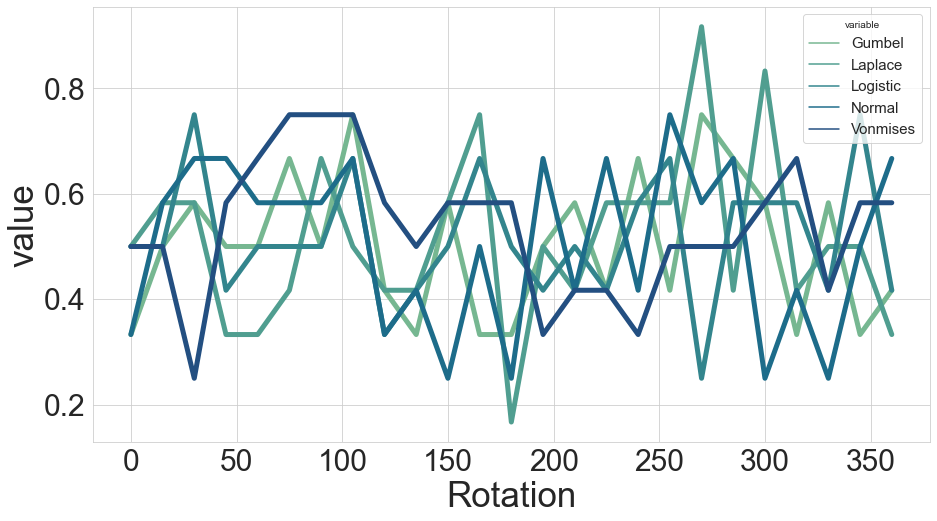

In [22]:
sns.lineplot(data=a,x='Rotation', y='value', hue='variable',palette=theme, lw=5)

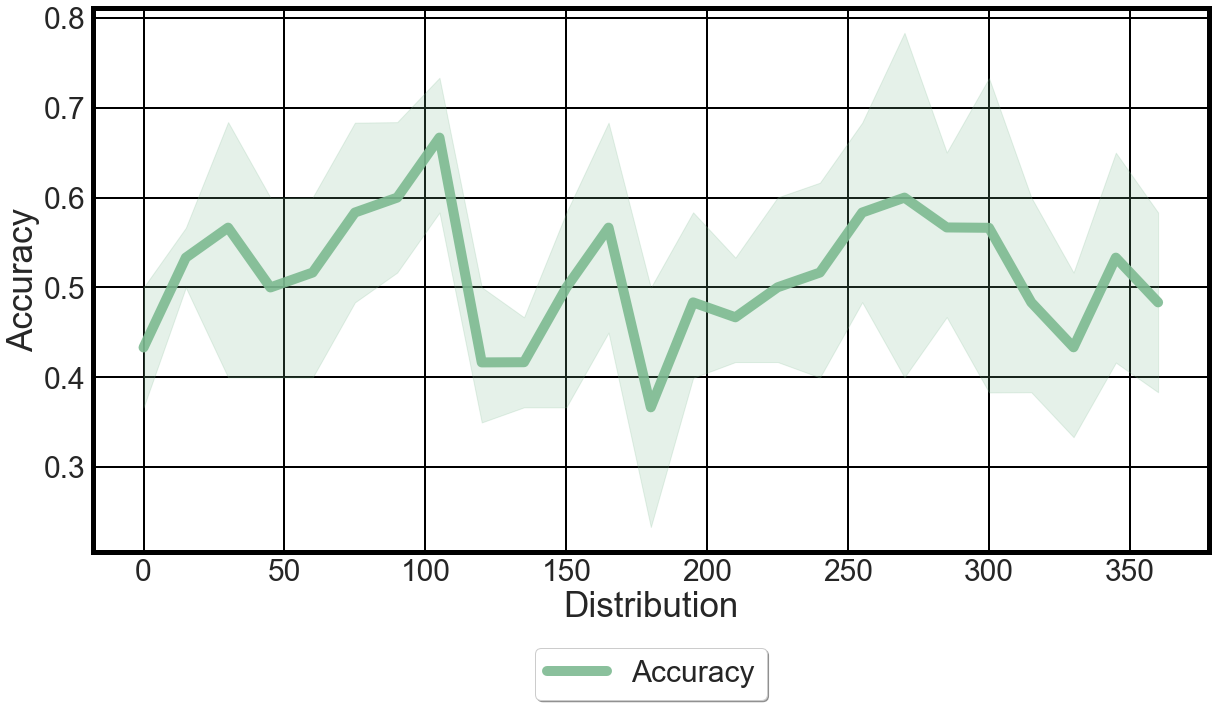

In [23]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=a, x="Rotation", y="value", ax=ax, palette=theme, lw=10,alpha=0.9)
# sns.set_style('darkgrid',)
# sns.set_style("whitegrid",)
# sns.lineplot(data=a, x="variable", y="value", hue="Rotation", ax=ax, palette=theme, lw=15)

plt.xlabel(u'Distribution')
plt.ylabel(u'Accuracy')
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')

## legend
handles, labels = ax.get_legend_handles_labels()
# [ha.set_linewidth(12) for ha in handles ]
plt.legend(labels=['Accuracy'], loc=8, bbox_to_anchor=(0.5, -.30), ncol=7, fancybox=True, shadow=True, fontsize=30)
# plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.30), ncol=7, fancybox=True, shadow=True, fontsize=30)

## Angle_F1

In [24]:
Angle_F1 = pd.read_excel('vqc_data_summary_latest.xlsx',sheet_name='Angle_F1')
Angle_F1.columns = Angle_F1.columns.str.title().str.strip()
Angle_F1[Angle_F1.columns.difference(['Rotation'])] = Angle_F1[Angle_F1.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

In [25]:
Angle_F1_qsvm = pd.read_excel('qsvm_data_summary_latest.xlsx',sheet_name='Angle_F1')
Angle_F1_qsvm.columns = Angle_F1_qsvm.columns.str.title().str.strip()
Angle_F1_qsvm[Angle_F1_qsvm.columns.difference(['Rotation'])] = Angle_F1_qsvm[Angle_F1_qsvm.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

In [26]:
Angle_F1.head(2)

,Rotation,Gumbel,Laplace,Logistic,Normal,Vonmises,Average,Variance
0,0,0.333,0.571,0.571,0.333,0.500,0.462,0.012
1,15,0.400,0.545,0.500,0.444,0.625,0.503,0.006


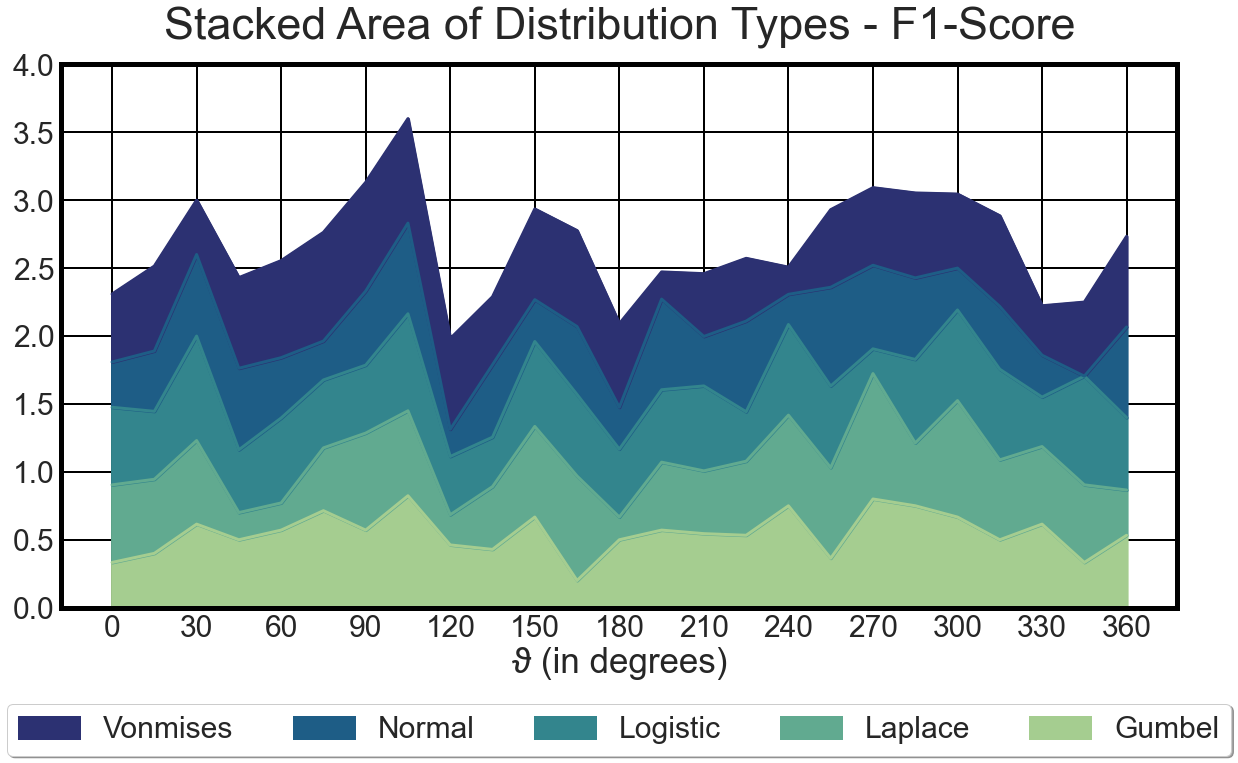

In [27]:
fig = plt.figure(figsize=(20,10))#, dpi=400)
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
ax = fig.add_subplot(1, 1, 1)

ax = Angle_F1[dists].plot.area(x='Rotation', ax=ax, cmap=theme, linewidth=3)#,cmap='winter')

plt.title('Stacked Area of Distribution Types - F1-Score',fontsize=45)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 4.5, 0.5))
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')

## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.30), ncol=5, fancybox=True, shadow=True, fontsize=30)

In [28]:
import pathlib
pathlib.Path().absolute()

WindowsPath('C:/Users/Telahun/Documents/School/Thesis')

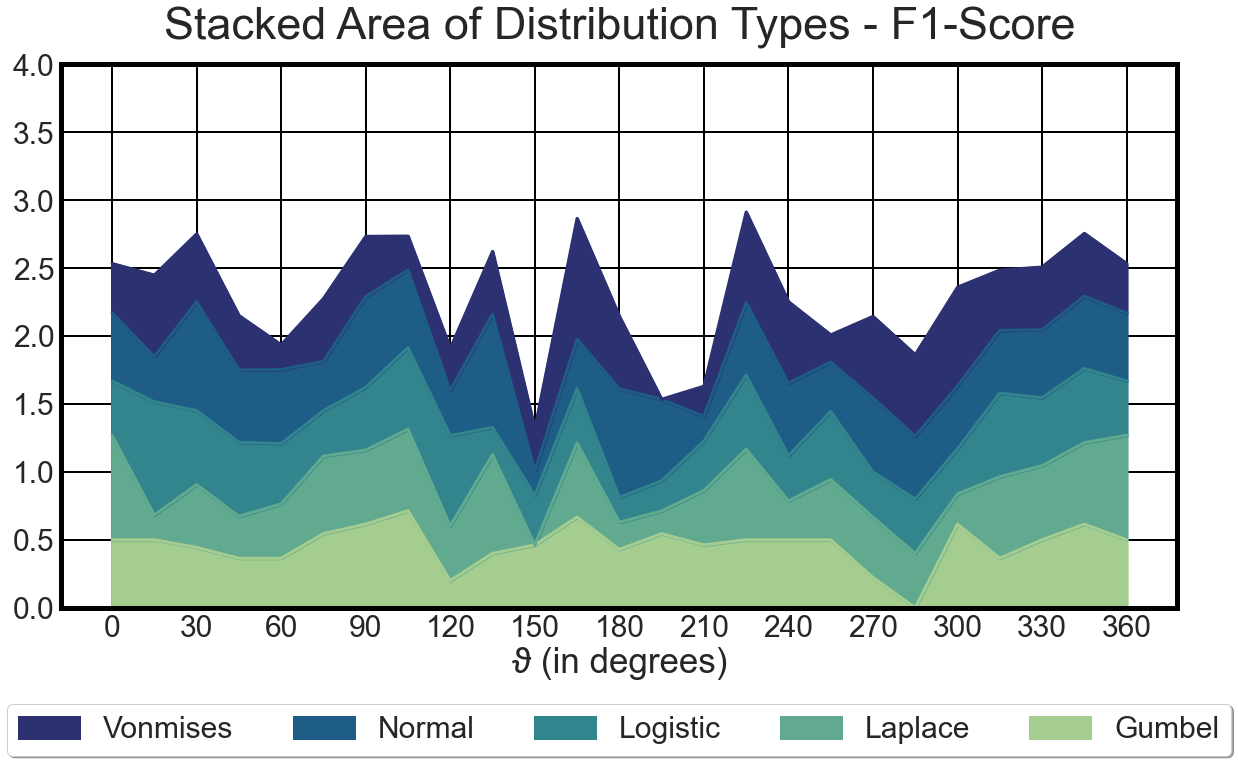

In [29]:
fig = plt.figure(figsize=(20,10))#, dpi=400)
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
ax = fig.add_subplot(1, 1, 1)

ax = Angle_F1_qsvm[dists].plot.area(x='Rotation', ax=ax, cmap=theme, linewidth=3)#,cmap='winter')

plt.title('Stacked Area of Distribution Types - F1-Score',fontsize=45)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 4.5, 0.5))
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')

## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.30), ncol=5, fancybox=True, shadow=True, fontsize=30)
# plt.savefig('filename2.png', dpi=400)
plt.show()

## Normal Sigma

In [43]:
sigma = pd.read_excel('vqc_data_summary_latest.xlsx',sheet_name='Normal_Sigma', usecols = "A:K")
sigma.columns = (['Rotation']+['Sigma'+str(i) for i in range(1,len(sigma.columns))])
sigma.columns = sigma.columns.str.title().str.strip()
sigma[sigma.columns.difference(['Rotation'])] = sigma[sigma.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

In [44]:
sigma_qsvm = pd.read_excel('qsvm_data_summary_latest.xlsx',sheet_name='Normal_Sigma', usecols = "A:K")
sigma_qsvm.columns = (['Rotation']+['Sigma'+str(i) for i in range(1,len(sigma.columns))])
sigma_qsvm.columns = sigma_qsvm.columns.str.title().str.strip()
sigma_qsvm[sigma_qsvm.columns.difference(['Rotation'])] = sigma_qsvm[sigma_qsvm.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

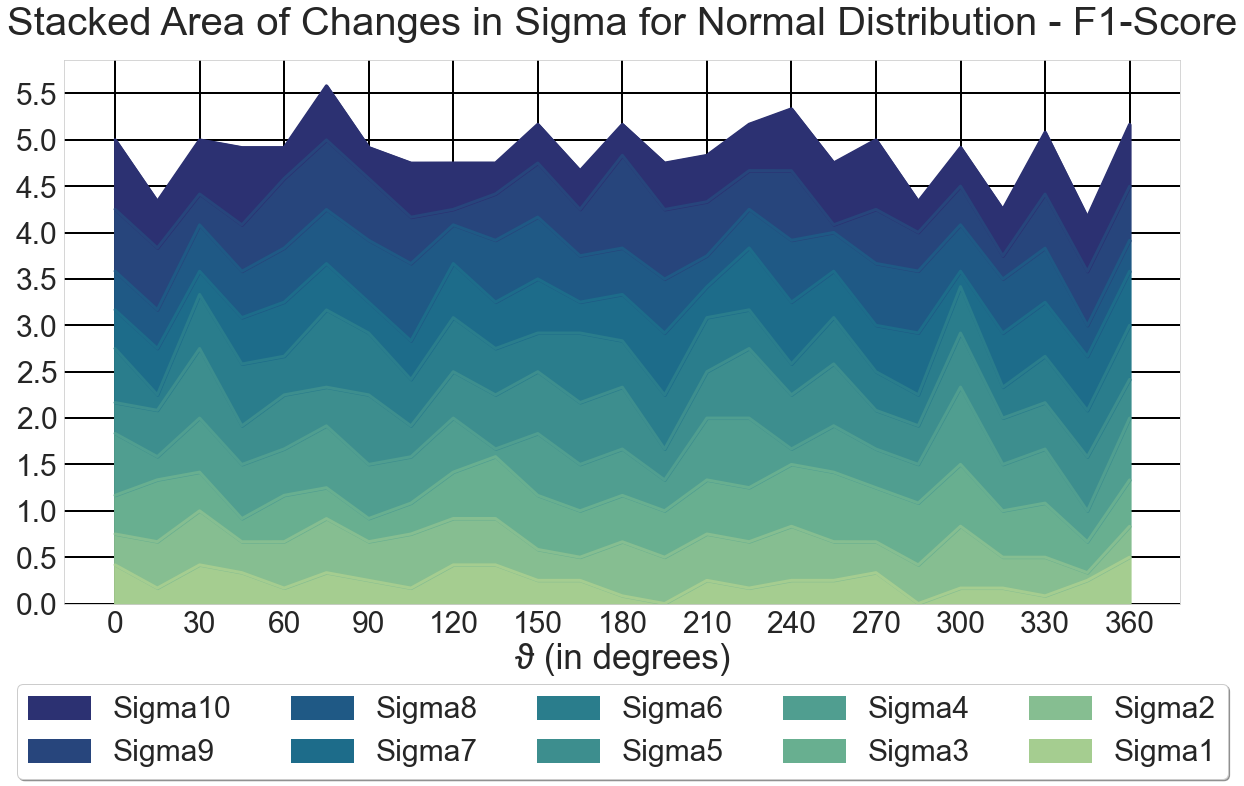

In [33]:
fig = plt.figure(figsize=(20,10))#, dpi=400)
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
ax = fig.add_subplot(1, 1, 1)

ax = sigma.plot.area(x='Rotation',ax=ax, cmap=theme, linewidth=3) #copper #crest #rainbow #cividis #icefire #tab20 #bone #gnuplot #jet #twilight_shifted
plt.title('Stacked Area of Changes in Sigma for Normal Distribution - F1-Score',fontsize=40)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 6, 0.5))


## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.35), ncol=5, fancybox=True, shadow=True, fontsize=30)

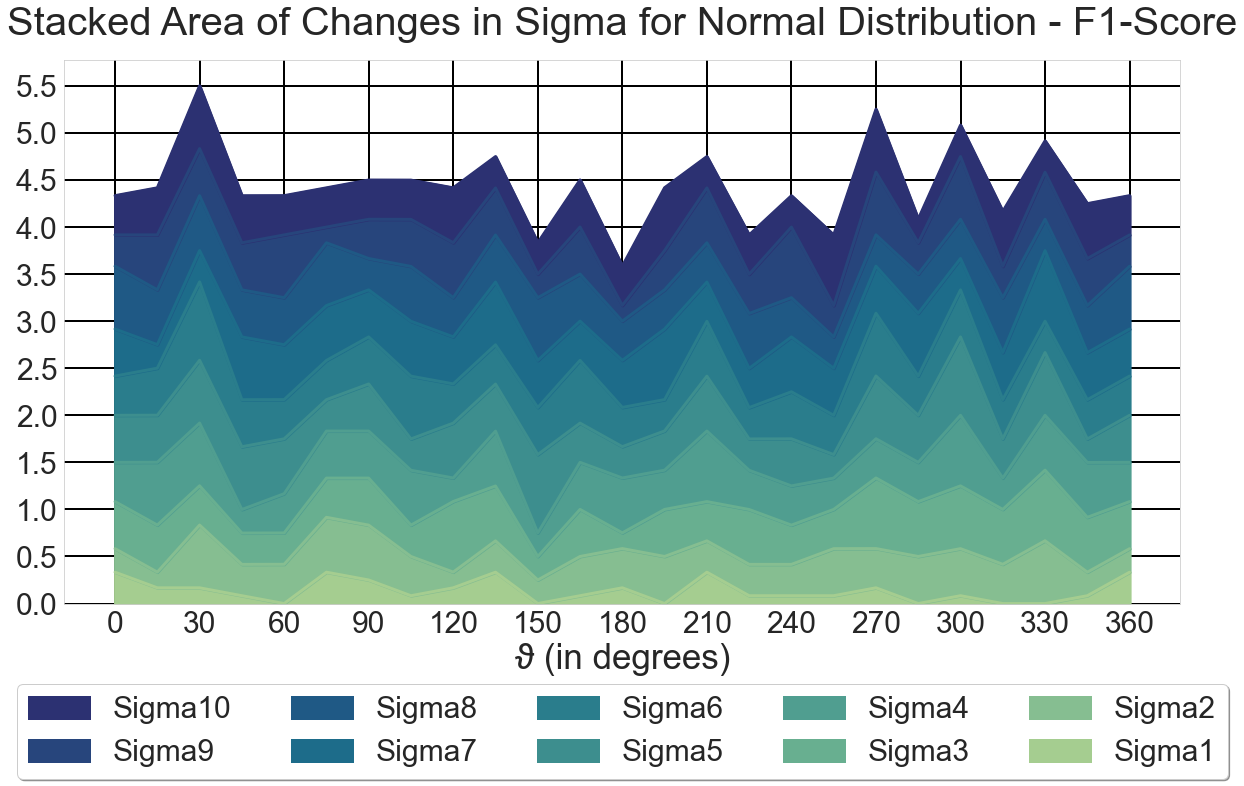

In [34]:
fig = plt.figure(figsize=(20,10))#, dpi=400)
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
ax = fig.add_subplot(1, 1, 1)

ax = sigma_qsvm.plot.area(x='Rotation',ax=ax, cmap=theme, linewidth=3) #copper #crest #rainbow #cividis #icefire #tab20 #bone #gnuplot #jet #twilight_shifted
plt.title('Stacked Area of Changes in Sigma for Normal Distribution - F1-Score',fontsize=40)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 6, 0.5))


## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.35), ncol=5, fancybox=True, shadow=True, fontsize=30)

In [35]:
pd.melt(sigma, id_vars=['Rotation'])

,Rotation,variable,value
0,0,Sigma1,0.417
1,15,Sigma1,0.167
2,30,Sigma1,0.417
3,45,Sigma1,0.333
4,60,Sigma1,0.167
...,...,...,...
245,300,Sigma10,0.417
246,315,Sigma10,0.500
247,330,Sigma10,0.667
248,345,Sigma10,0.583


Text(0.5, 0, 'Distribution Type')

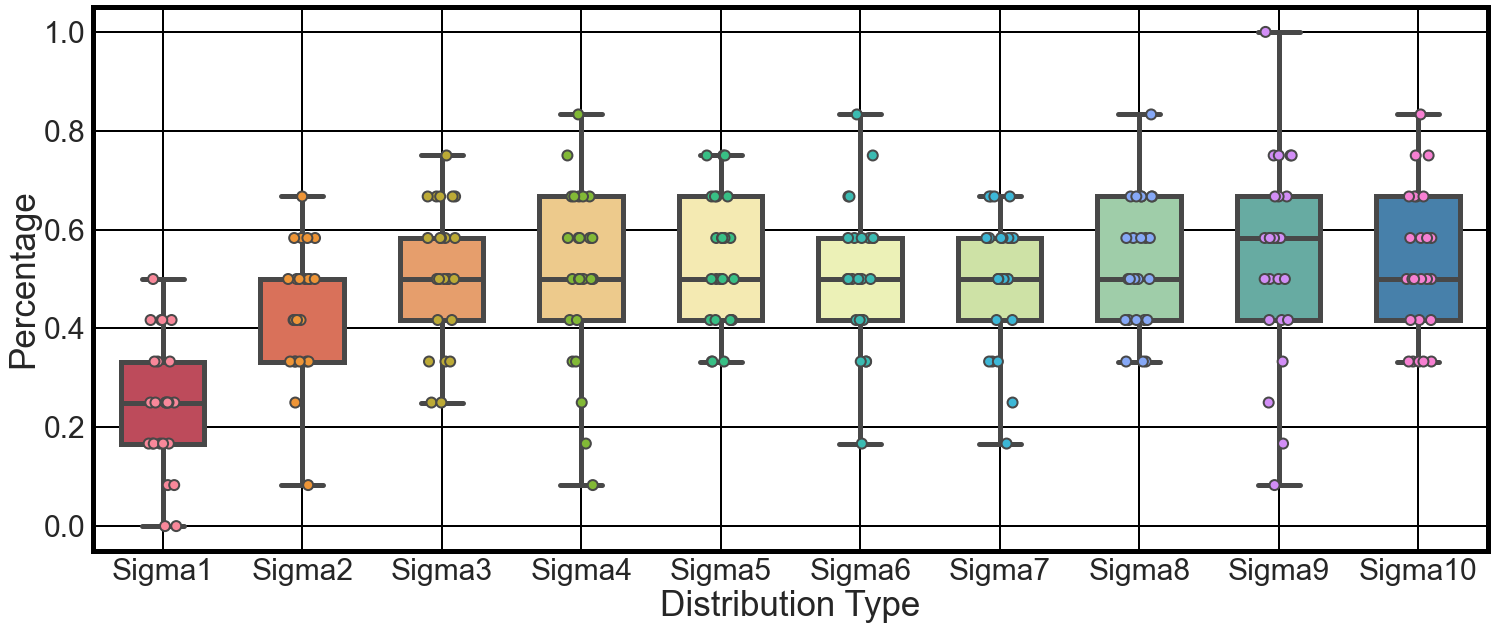

In [36]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1)


sns.stripplot(x="variable", y="value", data=pd.melt(sigma, id_vars=['Rotation']), linewidth=2, size=10)#, palette='magma_r')
sns.boxplot(  x="variable", y="value", data=pd.melt(sigma, id_vars=['Rotation']), linewidth=5, whis=[0,100], width=0.6, palette='Spectral')

plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('Percentage')

plt.xlabel(u'Distribution Type')

Text(0.5, 0, 'ϑ (in degrees)')

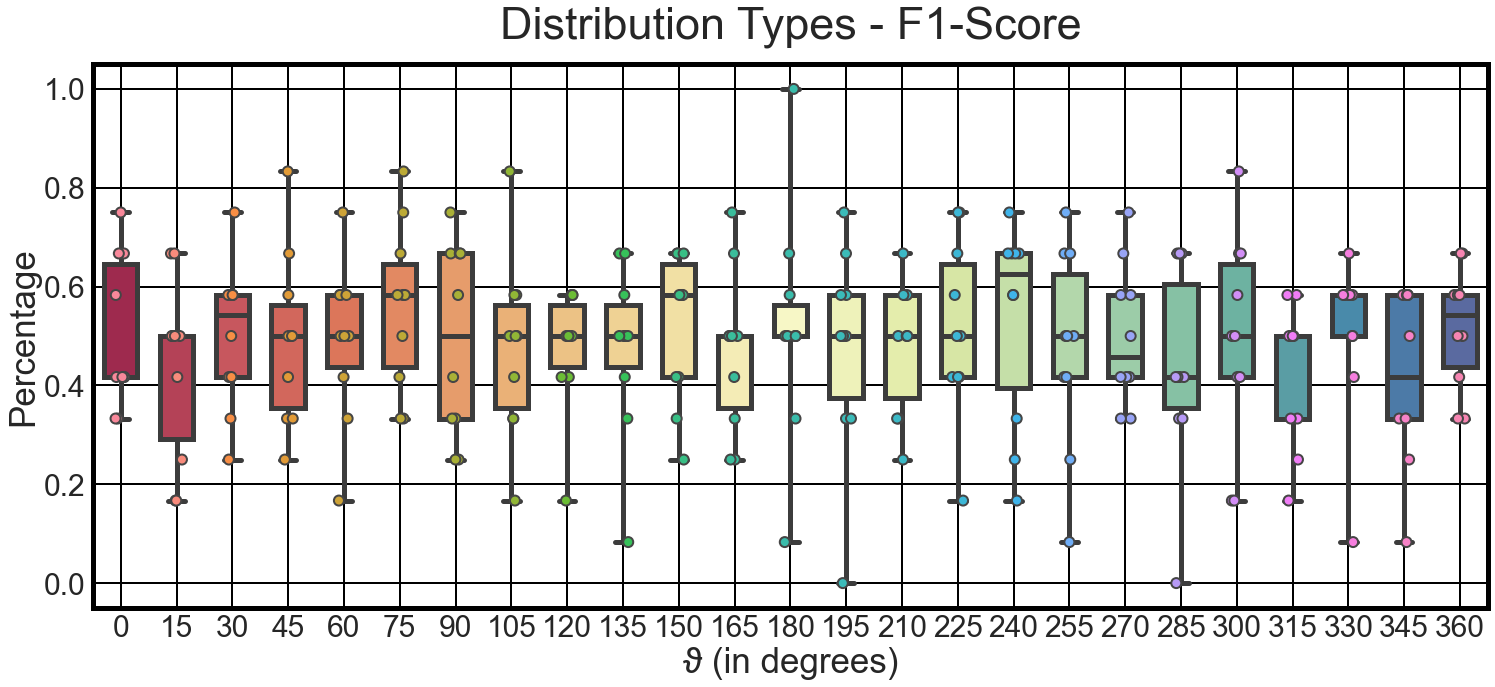

In [46]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1)


# sns.stripplot(x="variable", y="value", data=pd.melt(Angle_F1[dists], id_vars=['Rotation']), linewidth=2, size=10)#, palette='magma_r')
# sns.boxplot(  x="variable", y="value", data=pd.melt(Angle_F1[dists], id_vars=['Rotation']), linewidth=5, whis=[0,100], width=0.6, palette='Spectral')

sns.stripplot(x="Rotation", y="value", data=pd.melt(sigma, id_vars=['Rotation']), linewidth=2, size=10)
sns.boxplot(  x="Rotation", y="value", data=pd.melt(sigma, id_vars=['Rotation']), linewidth=5, whis=[0,100], width=0.6, palette='Spectral')#, order=["DC", "DMC", "FFMC", "ISI"])


plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('Percentage')
# plt.title('Box and Scatter plot of Distribution Types - F1-Score',fontsize=45)
plt.title('Distribution Types - F1-Score',fontsize=45)


# plt.xlabel(u'Distribution Type')
plt.xlabel(u'ϑ (in degrees)')

## Normal POS NEG

In [37]:
normal = pd.read_excel('vqc_data_summary_latest.xlsx',sheet_name='Normal_POS_NEG')
normal.columns = ["Rotation", "Negative Two", "Zero", "Two"]
normal.columns = normal.columns.str.title().str.strip()
normal[normal.columns.difference(['Rotation'])] = normal[normal.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

In [38]:
normal_qsvm = pd.read_excel('qsvm_data_summary_latest.xlsx',sheet_name='Normal_POS_NEG')
normal_qsvm.columns = ["Rotation", "Negative Two", "Zero", "Two"]
normal_qsvm.columns = normal_qsvm.columns.str.title().str.strip()
normal_qsvm[normal_qsvm.columns.difference(['Rotation'])] = normal_qsvm[normal_qsvm.columns.difference(['Rotation'])].apply(lambda x: round(x, 3))

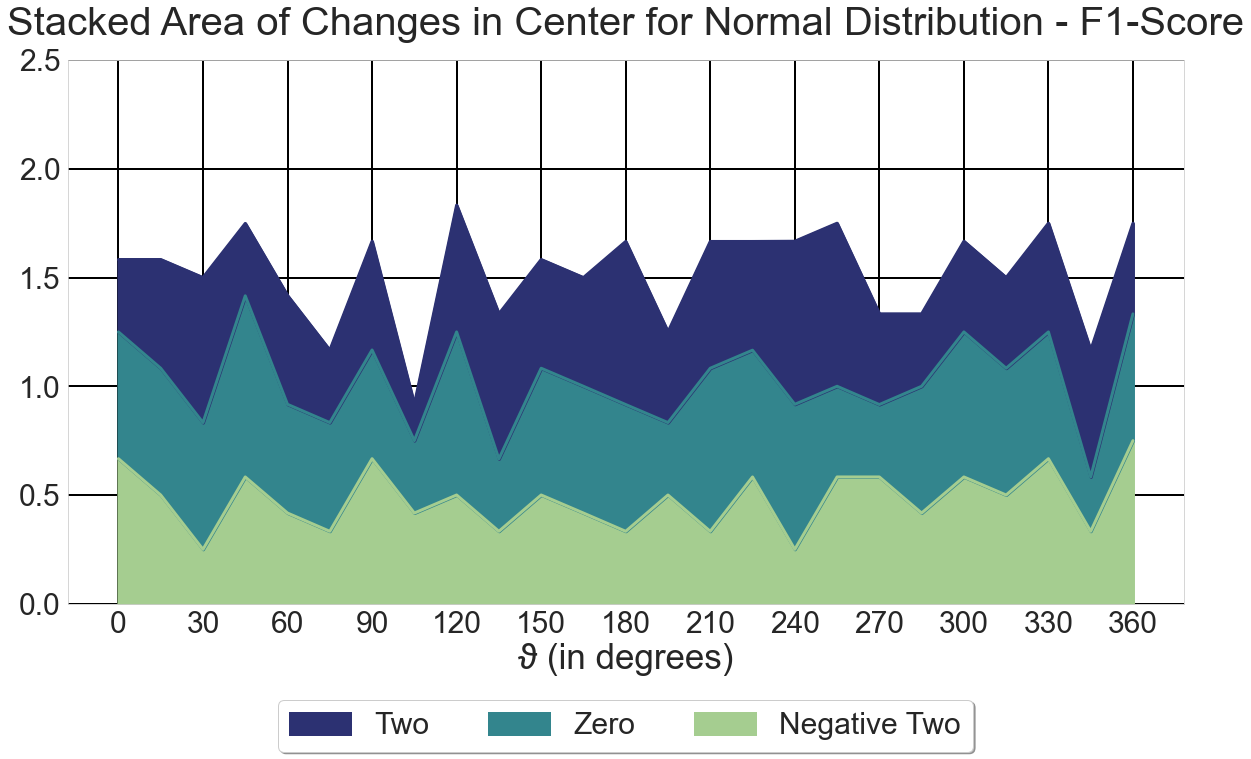

In [39]:
fig = plt.figure(figsize=(20,10))
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
ax = fig.add_subplot(1, 1, 1)

ax = normal.plot.area(x='Rotation',ax=ax, cmap=theme, linewidth=3) #copper #crest #rainbow #cividis #icefire #tab20 #bone #gnuplot #jet #twilight_shifted
plt.title('Stacked Area of Changes in Center for Normal Distribution - F1-Score',fontsize=40)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 3, 0.5))


## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.3), ncol=5, fancybox=True, shadow=True, fontsize=30)

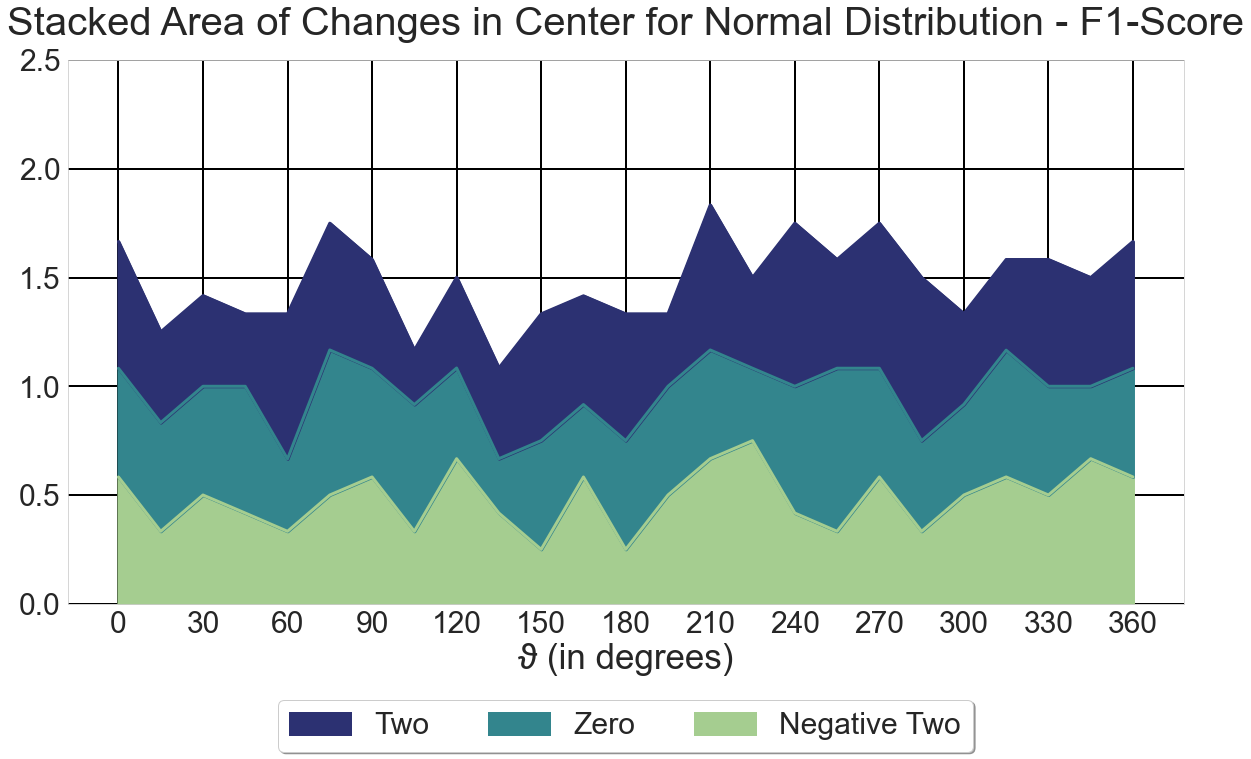

In [40]:
fig = plt.figure(figsize=(20,10))
plt.grid(color='black', linestyle='-', linewidth=2)
plt.setp(ax.spines.values(), linewidth=5, color='black')
ax = fig.add_subplot(1, 1, 1)

ax = normal_qsvm.plot.area(x='Rotation',ax=ax, cmap=theme, linewidth=3) #copper #crest #rainbow #cividis #icefire #tab20 #bone #gnuplot #jet #twilight_shifted
plt.title('Stacked Area of Changes in Center for Normal Distribution - F1-Score',fontsize=40)

plt.xlabel(u'ϑ (in degrees)')
plt.xticks(np.arange(0, 390, 30))
plt.yticks(np.arange(0, 3, 0.5))


## legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=8, bbox_to_anchor=(0.5, -.3), ncol=5, fancybox=True, shadow=True, fontsize=30)

## Datasets

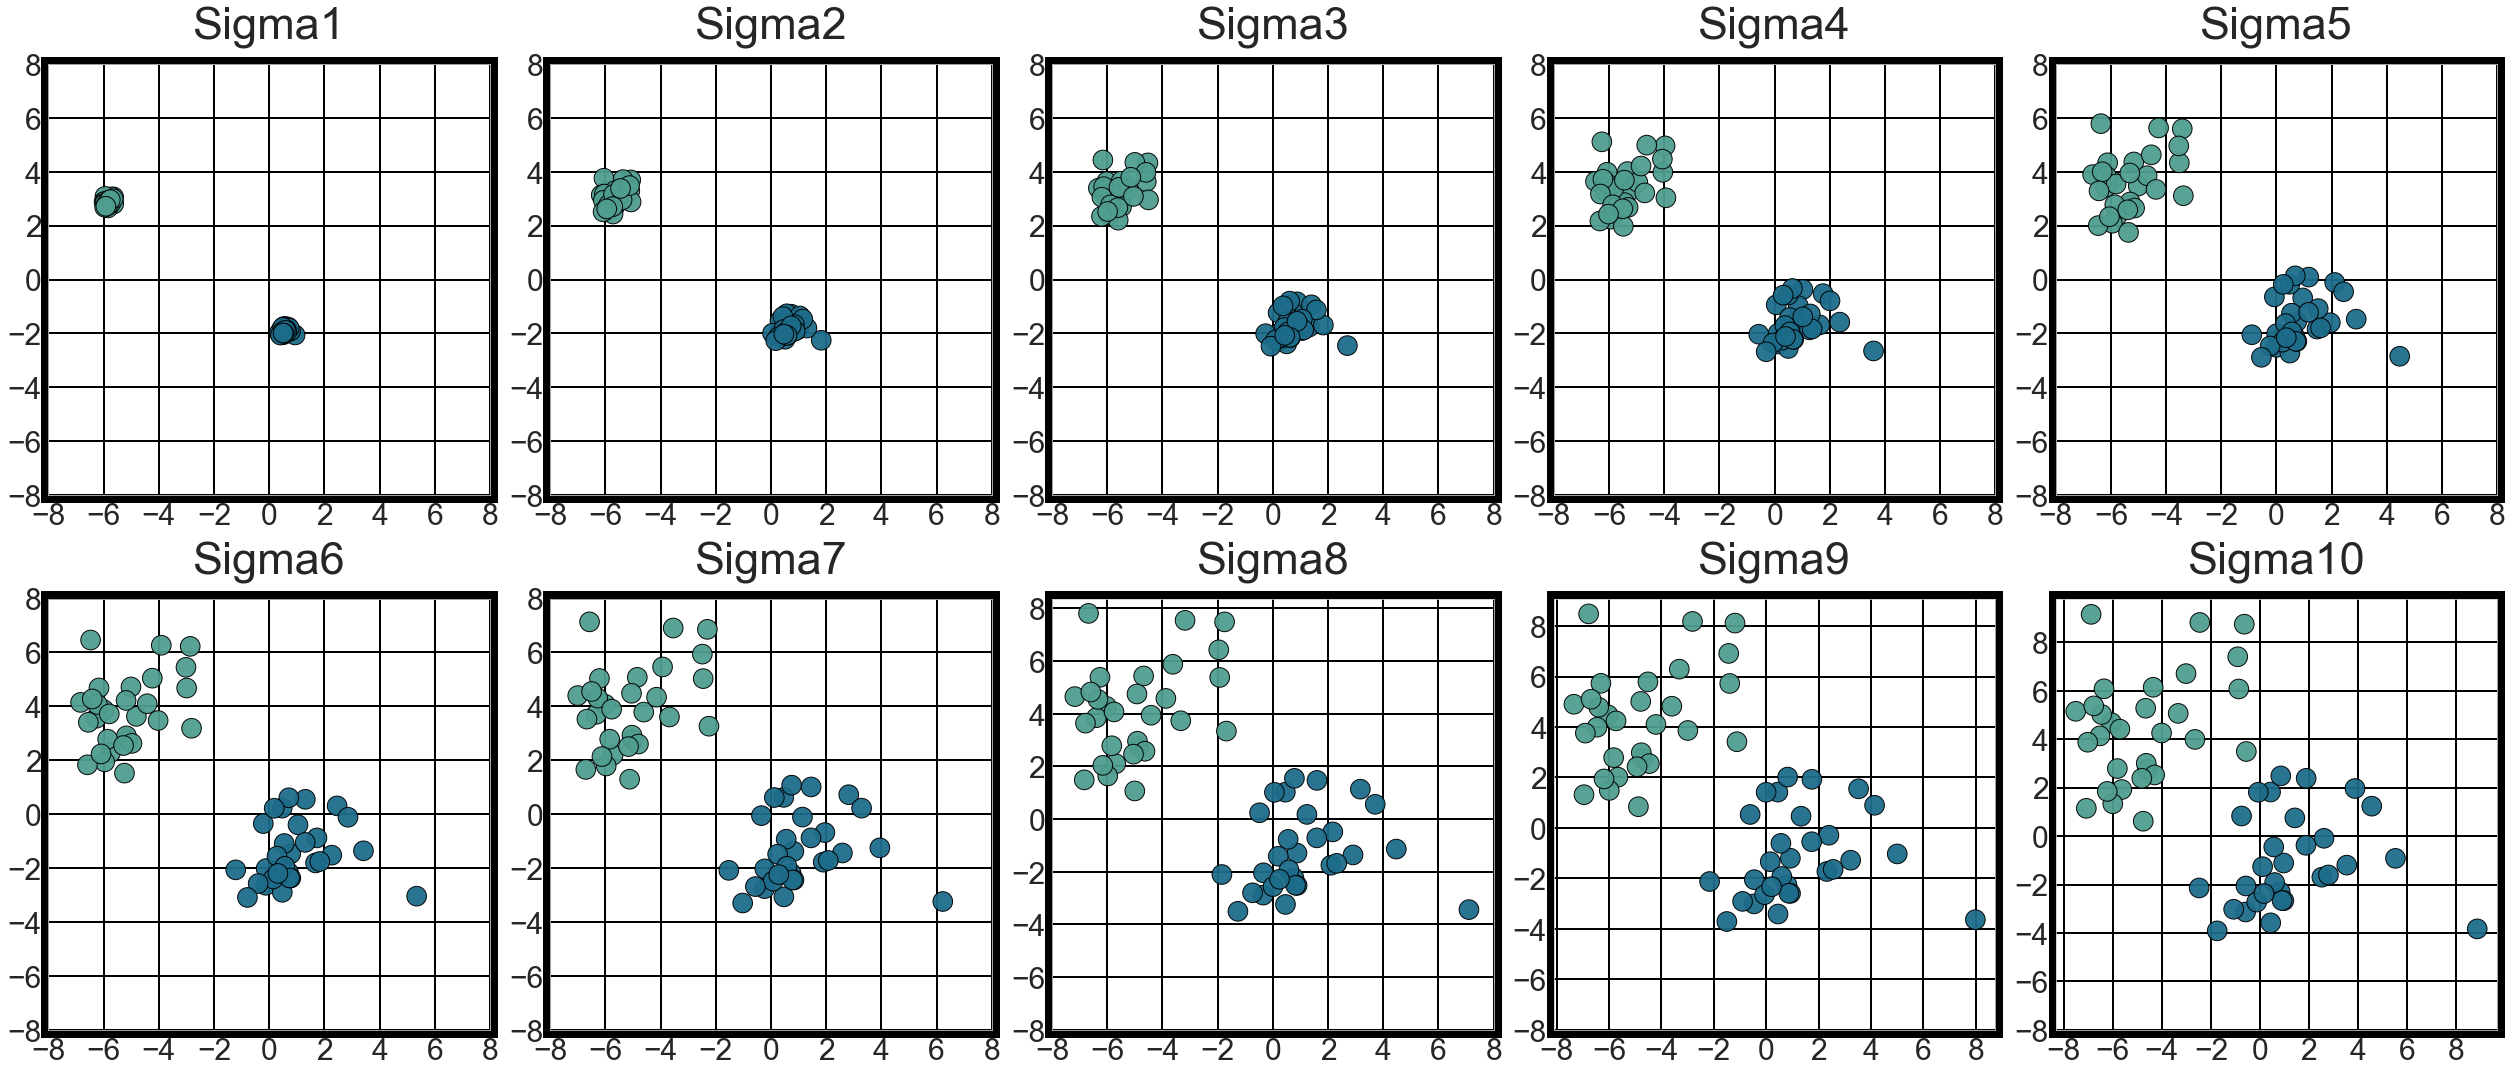

In [47]:
# fig = plt.figure(figsize=(20,10))#, dpi=400)

alpha = 0.95
# ax = fig.add_subplot(1, 1, 1)

sigmas = [0.1,.311111111,0.522222222,0.733333333,0.944444444,1.155555556,1.366666667,1.577777778,1.788888889,2]
titles = ['Sigma'+str(i) for i in range(1,len(sigma.columns))]
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(35,15))#, dpi=400)

idx = 0
# for sigma in sigmas:
for  j in range(nrows):
    for i in range(ncols):
#         x = datagen.rotate_2d(
#             points=X,
#             origin=(0.0,0.0),
#             degrees=0
#         )
        X, y = datagen.make_blobs(
            n_samples=60,
            n_features=2,
            distribution="gumbel",
            centers=2,
            cluster_std=sigmas[idx],
            center_box= (-7.5, 7.5),
        #     shuffle: bool = True,
            random_state=72,
        )
        x=X
        x_x, x_y = x[:,:1].reshape(-1,), x[:,1:].reshape(-1,)
        sns.scatterplot(x=x_x, y=x_y,hue=y, ax=axes[j,i], palette=theme, s=385, linewidth=1, alpha=alpha, edgecolor='black')
        
        axes[j,i].set_title(u'{}'.format(titles[idx]),fontsize=45)
        #axes[j,i].title(u'{}°'.format(sigmas[idx]),fontsize=45)
        axes[j,i].grid(color='black', linestyle='-', linewidth=2)
        add_subplot_border(axes[j,i])
        #plt.setp(ax.spines.values(), linewidth=5, color='black')
        axes[j,i].get_legend().remove()
        idx += 1
plt.setp(axes, xticks=range(-8,10,2),
        yticks=range(-8,10,2))
fig.tight_layout()

In [ ]:
alpha = 0.95

sigmas = [0.1,.311111111,0.522222222,0.733333333,0.944444444,1.155555556,1.366666667,1.577777778,1.788888889,2]
rots = np.arange(15.0, 375.0, 15.0)
titles = [u'{}°'.format(str(int(i))) for i in rots]
nrows, ncols = 4, 6
fig, axes = plt.subplots(nrows, ncols, figsize=(45,25))#, dpi=400)

idx = 0
# for sigma in sigmas:
for  j in range(nrows):
    for i in range(ncols):

        X, y = datagen.make_blobs(
            n_samples=60,
            n_features=2,
            distribution="vonmises",
            centers=2,
#             cluster_std=sigmas[idx],
            center_box= (-7.5, 7.5),
        #     shuffle: bool = True,
            random_state=72,
        )
        x=X
        x = datagen.rotate_2d(
            points=X,
            origin=(0.0,0.0),
            degrees=rots[idx]
        )
        x_x, x_y = x[:,:1].reshape(-1,), x[:,1:].reshape(-1,)
        sns.scatterplot(x=x_x, y=x_y,hue=y, ax=axes[j,i], palette=theme, s=385, linewidth=1, alpha=alpha, edgecolor='black')
        
        axes[j,i].set_title(u'{}'.format(titles[idx]),fontsize=45)
        #axes[j,i].title(u'{}°'.format(sigmas[idx]),fontsize=45)
        axes[j,i].grid(color='black', linestyle='-', linewidth=2)
        #plt.setp(ax.spines.values(), linewidth=5, color='black')
        add_subplot_border(axes[j,i])
        #axes[j,i].xaxis.set_major_locator(plt.MaxNLocator(2))
        #axes[j,i].yaxis.set_major_locator(plt.MaxNLocator(2))
        axes[j,i].get_legend().remove()
        idx += 1
plt.setp(axes, xticks=range(-8,10,2),
        yticks=range(-8,10,2))
## log normal
# plt.setp(axes, xticks=range(-100,100,20),
#         yticks=range(-100,100,20))
fig.tight_layout()